In [1]:
from run_sim import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# set up dataframe for collecting event data
mtd_stats, attack_stats = run_sim()

Target Node is:  72


Adversary: Start SCAN_HOST at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 7.0s.
Adversary: Start SCAN_PORT at 7.0s.
Adversary: Processed SCAN_PORT at 17.0s.
Adversary: Start EXPLOIT_VULN at 17.0s.
Adversary: Processed EXPLOIT_VULN at 38.6s.
Adversary: Host 0 has been compromised at 38.6s!
Adversary: Start SCAN_NEIGHBOR at 38.6s.
Adversary: Processed SCAN_NEIGHBOR at 43.6s.
Adversary: Start ENUM_HOST at 43.6s.
Adversary: Processed ENUM_HOST at 45.6s.
Adversary: Start SCAN_PORT at 45.6s.
Adversary: Processed SCAN_PORT at 55.6s.
Adversary: Start EXPLOIT_VULN at 55.6s.
MTD: serviceDiversity triggered 60.0s
MTD: serviceDiversity deployed in the network at 60.0s.
Adversary: Processed EXPLOIT_VULN at 76.9s.
Adversary: Host 38 has been compromised at 76.9s!
Adversary: Start SCAN_NEIGHBOR at 76.9s.
Adversary: Processed SCAN_NEIGHBOR at 81.9s.
Adversary: Start ENUM_HOST at 81.9s.
Adversary: Processed ENUM_HOST at 83.9s.
Adve

In [3]:
print(mtd_stats.dict())
mtd_operation_record = pd.DataFrame(mtd_stats.mtd_operation_record)

mtd_operation_record

{'Total suspended MTD': 157, 'Total triggered MTD': 518, 'Total executed MTD': 360, 'Total attack interrupted': 315, 'Switch MTD interval at': {0: 60, 10043.856344813546: 30.0, 20016.307551395366: 15.0}, 'Switch MTD strategy at': {0: 'diversity', 2597.8392156103464: 'shuffle', 10713.921711383839: 'hybrid'}}


,name,start_time,finish_time,duration
0,serviceDiversity,60.040595,100.350977,40.310382
1,serviceDiversity,120.920289,161.375436,40.455147
2,serviceDiversity,181.014170,221.294867,40.280697
3,serviceDiversity,241.802890,281.810778,40.007889
4,serviceDiversity,302.315197,342.435233,40.120036
...,...,...,...,...
355,PortShuffle,20202.279197,20242.360457,40.081260
356,serviceDiversity,20247.859173,20288.029012,40.169838
357,osdiversity,20293.356786,20323.879064,30.522278
358,IPShuffle,20309.427815,20360.418464,50.990649


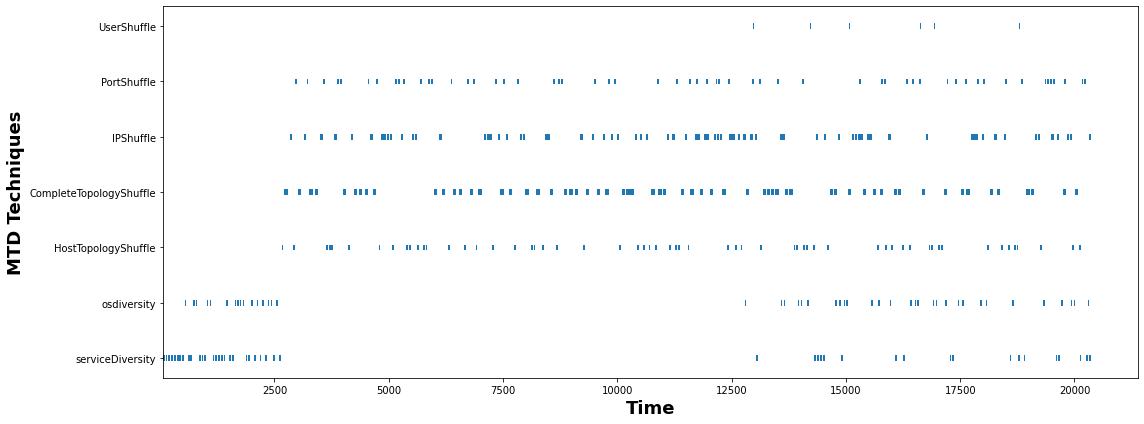

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(attack_stats.attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,0,0,0,,[],,
1,ENUM_HOST,5.000000,7.000000,2.000000,-1,0,0,0,,[],,
2,SCAN_PORT,7.000000,17.000000,10.000000,0,1,0,0,,[],,
3,EXPLOIT_VULN,17.000000,38.647632,21.647632,0,1,0,0,0,"[Koral, Korrie, Zea, Fedora, Windy]",,
4,SCAN_NEIGHBOR,38.647632,43.647632,5.000000,0,1,29,1,,[],,
...,...,...,...,...,...,...,...,...,...,...,...,...
2596,SCAN_PORT,20369.418464,20379.418464,10.000000,19,2,894,199,,[],,
2597,EXPLOIT_VULN,20379.418464,20400.108067,20.689602,19,2,894,199,19,[],,
2598,SCAN_NEIGHBOR,20400.108067,20405.108067,5.000000,19,2,894,200,,[],,
2599,ENUM_HOST,20405.108067,20407.108067,2.000000,19,2,894,200,,[],,


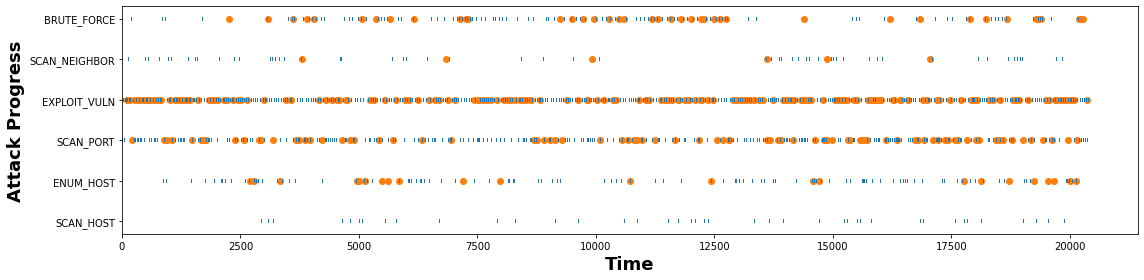

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)
interrupted_record = attack_operation_record[attack_operation_record['interrupted_by'] != '']
ax2.scatter( interrupted_record['finish_time'], interrupted_record['name'])
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
241,SCAN_PORT,2101.567201,2111.567201,10.0,79,2,504,33,79,[Cheri],,
358,SCAN_PORT,2950.527247,2960.527247,10.0,54,5,592,46,54,[Robbyn],,
437,SCAN_PORT,3517.735581,3527.735581,10.0,68,2,658,55,68,[Jayne],,
468,SCAN_PORT,3738.056066,3748.056066,10.0,81,1,659,57,81,[Kaye],,
569,SCAN_PORT,4619.543018,4629.543018,10.0,93,1,712,64,93,[],,
773,SCAN_PORT,6300.207292,6310.207292,10.0,85,1,758,76,85,[],,
797,SCAN_PORT,6396.481524,6406.481524,10.0,85,7,758,78,85,[Jacquette],,
991,SCAN_PORT,8158.862806,8168.862806,10.0,84,1,775,84,84,[],,
1044,SCAN_PORT,8469.753767,8479.753767,10.0,87,2,779,87,87,[],,
1357,SCAN_PORT,11313.304212,11323.304212,10.0,117,3,789,102,117,[],,


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
3,EXPLOIT_VULN,17.000000,38.647632,21.647632,0,1,0,0,0,"[Koral, Korrie, Zea, Fedora, Windy]",,
7,EXPLOIT_VULN,55.647632,76.929477,21.281845,38,1,29,1,38,"[Alvera, Hillary, Aubine, Millisent]",,
13,EXPLOIT_VULN,112.350977,133.573811,21.222834,45,1,41,2,45,"[Cairistiona, Carmelita, Elinore, Vikki, Kiri]",,
25,EXPLOIT_VULN,233.294867,253.816317,20.521450,43,1,68,3,43,"[Ronalda, Constancia, Milka, Lorie, Natalina]",,
31,EXPLOIT_VULN,293.810778,314.014512,20.203734,47,1,72,4,47,"[Donna, Desdemona, Carmita, Sadye]",,
...,...,...,...,...,...,...,...,...,...,...,...,...
2552,EXPLOIT_VULN,19967.457205,19988.034353,20.577148,15,2,889,195,15,[],,
2561,EXPLOIT_VULN,20029.410031,20049.670158,20.260127,16,1,894,196,16,[],,
2571,EXPLOIT_VULN,20105.917944,20126.176991,20.259047,17,2,894,197,17,[],,
2588,EXPLOIT_VULN,20300.029012,20320.437053,20.408042,18,1,894,198,18,[Maurine],,


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)

In [11]:
attack_operation_record = pd.read_csv('data_analysis/attack_operation_record.csv')